# Objektorientierung: Eine Fallstudie

In [139]:
%mavenRepo bintray https://dl.bintray.com/egp/maven
%maven ch.unibas.informatik:jturtle:0.5
import ch.unibas.informatik.jturtle.Turtle;

## Ziel:

Dise Fallstudie soll die objektorientierte Vorgehensweise anhand von einer etwas komplexeren Aufgabenstellung zu illustrieren. Das Ziel ist es eine Zeichenanwendung zu programmieren, die verschiedene geometrische Objekte zeichnen kann. 

Die Konzepte sind auf dem folgenden Bild zusammengefasst:
![drawing](../notebooks/images/drawing.png)

In Code wollen wir das wie folgt umsetzten:


```java
Line line = new Line(new Point(-50, -50), new Point(50, -50));

Triangle triangle = new Triangle(
    new Point(-50, -50), 
    new Point(0, 50), 
    new Point(50, -50)
);

Drawing drawing = new Drawing();
drawing.draw(line);
drawing.draw(triangle);

drawing.show();
```

## Implementation

In [165]:
class Point {
    
    double x;
    double y;
    
    Point(double x, double y) {
        this.x = x;
        this.y = y;
    }
    
    Vector minus(Po\int p) {
        return new Vector(this.x - p.x, this.y - p.y);
    }
}

In [158]:
class Vector {
    double x;
    double y;
    
    Vector(double x, double y) {
        this.x = x;
        this.y = y;
    }
    
    double dotProd(Vector v) {
        return this.x * v.x + this.y * v.y;
    }
    
    double norm() {
        return Math.sqrt(this.x * this.x + this.y * this.y);
    }
}

In [176]:
class Line {

    Point p1;
    Point p2;
    
    Line(Point p1, Point p2) {
        this.p1 = p1;
        this.p2 = p2;
    }
    
    void drawWithTurtle(Turtle turtle) {
        setTurtlePosition(turtle, p1);
        turtle.penDown();
        
        Vector v = p2.minus(p1);
        Vector e2 = new Vector(0, 1);
        
        double angle = Math.acos(v.dotProd(e2) / (v.norm() * e2.norm()));
        double angleInDegree = angle * 360 / (2 * 3.14157);
        if (v.x > 0) {
            turtle.turnRight(angleInDegree);
        } else {
            turtle.turnLeft(angleInDegree);
        }
        turtle.forward(v.norm());
    }
    
    void setTurtlePosition(Turtle turtle, Point p) {
        turtle.penUp();
        turtle.home();
        turtle.forward(p.y);
        turtle.turnRight(90);
        turtle.forward(p.x);
        turtle.turnLeft(90);
    }

}

In [177]:
class Triangle {
    
    Point p1;
    Point p2;
    Point p3;
    
    Triangle(Point p1, Point p2, Point p3) {
        this.p1 = p1;
        this.p2 = p2;
        this.p3 = p3;
    }
    
    void drawWithTurtle(Turtle turtle) {
        Line line1 = new Line(p1, p2);
        Line line2 = new Line(p2, p3);
        Line line3 = new Line(p3, p1);
        line1.drawWithTurtle(turtle);
        line2.drawWithTurtle(turtle);
        line3.drawWithTurtle(turtle);
    }
    
}

In [178]:
class Drawing {

    Turtle turtle;
    
    Drawing() {
        this.turtle = new Turtle();
    }
    
    void draw(Triangle triangle) {
        triangle.drawWithTurtle(turtle);
    }
    
    void draw(Line line) {
        line.drawWithTurtle(turtle);
    }
    
    void show() {
        display(turtle.toImage());
    }
    
}

#### Testprogramm

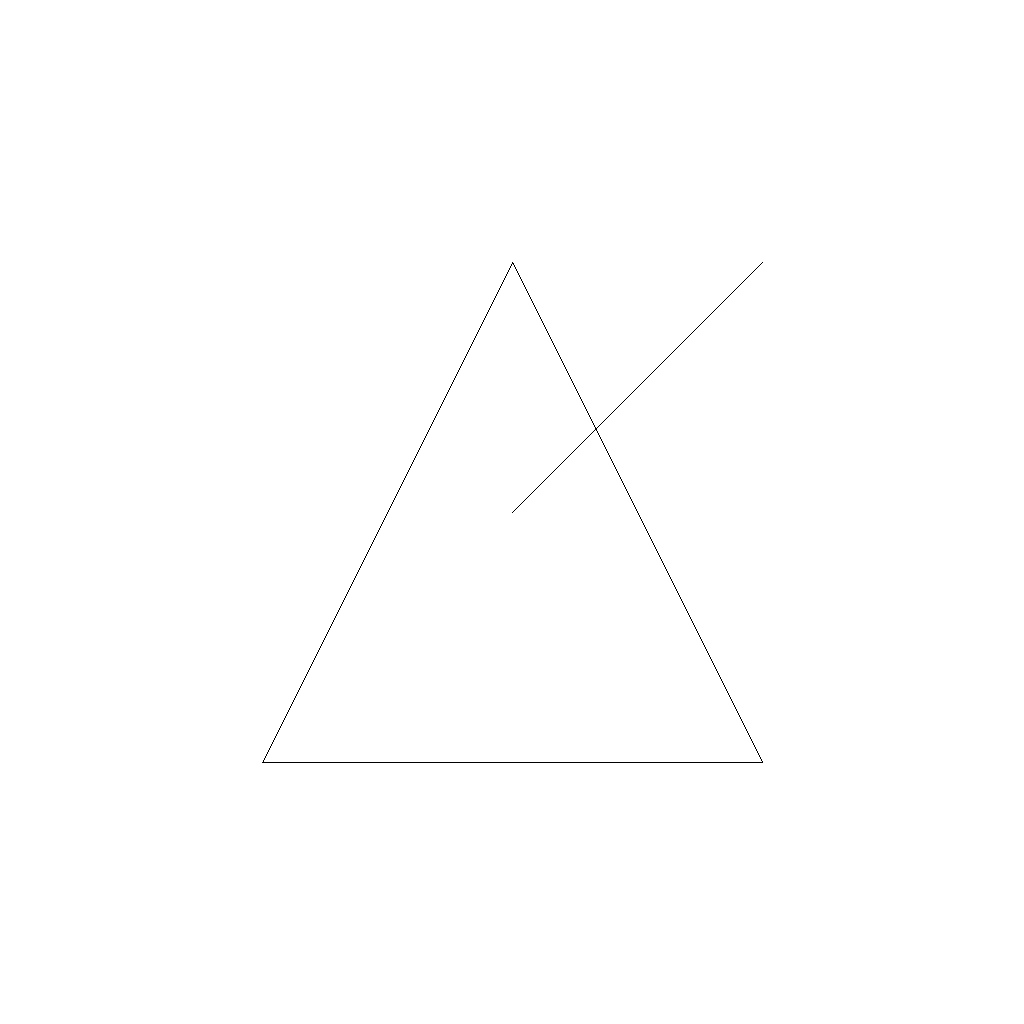

In [179]:
Line line = new Line(new Point(0, 0), new Point(50, 50));

Triangle triangle = new Triangle(
    new Point(-50, -50), 
    new Point(0, 50), 
    new Point(50, -50)
);

Drawing drawing = new Drawing();
drawing.draw(line);
drawing.draw(triangle);

drawing.show();
